In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [25]:
df = pd.read_csv('amenities.csv', na_values = 'NaN', encoding = 'latin-1')

In [26]:
display(df)

,price,Bathtub,Electric stove,Microwave,Courtyard view,Laundromat nearby,Kitchen,Refrigerator,Central air conditioning,Smoke alarm,...,Gym,Outlet covers,Paid washer  In building,Shared patio or balcony,Paid parking garage off premises,Sound system,Rice maker,Breakfast,Paid parking off premises,Shared gym in building
0,10,0,0,1,0,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
1,15,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,19,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1964,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
987,1989,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
988,1995,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
989,1997,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [27]:
X = df.drop('price', axis=1)
y = df['price']

In [28]:
dtree = DecisionTreeRegressor(min_samples_leaf = 65, splitter = "best")

Split data into train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Train model on training set

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=65)

Test accuracy of machine learning model with unseen test data

In [33]:
dtree.score(X_train,y_train)

0.5509995689240814

In [34]:
dtree.score(X_test,y_test)


0.5597856129447054

In [35]:
y_pred = dtree.predict(X_test)

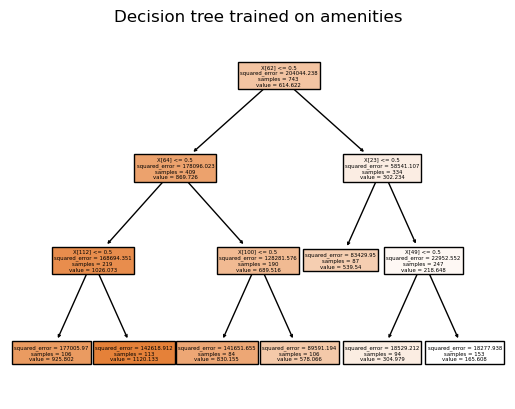

In [36]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(dtree, filled=True)
plt.title("Decision tree trained on amenities")
plt.show()

In [38]:
#multiple runs aggregated
NumRuns = 1000
RunList = []

for i in range(NumRuns):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random.randint(1,100000000))
    dtree.fit(X_train,y_train)
    n_score = dtree.score(X_test,y_test)
    RunList.append(n_score)

In [39]:
range_RunList = min(RunList), max(RunList)
average_score = sum(RunList)/NumRuns

range_RunList, average_score

((0.37415331615531844, 0.6312391354442138), 0.517841374637312)

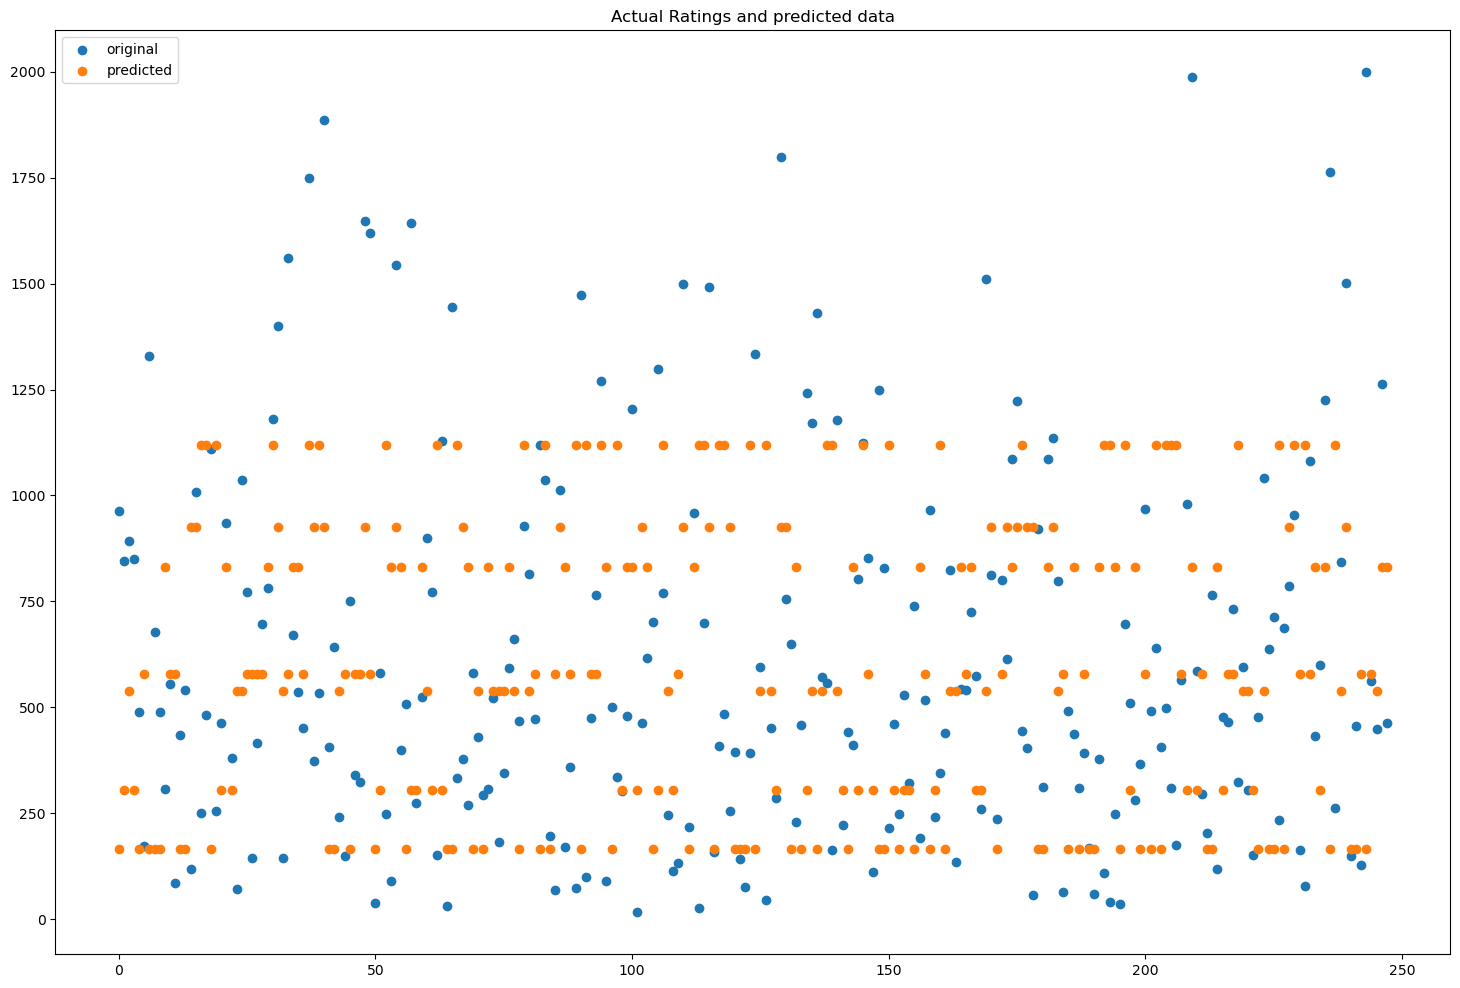

In [40]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,12))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, label="original")
plt.scatter(x_ax,y_pred, label="predicted")
plt.title("Actual Ratings and predicted data")
plt.legend()
plt.show()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [105]:
clf = AdaBoostRegressor(n_estimators=300, learning_rate = 2)

In [103]:
clf.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=2, n_estimators=300)

In [104]:
clf.score(X_test, y_test)

0.26759235323032415